# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
from math import log10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

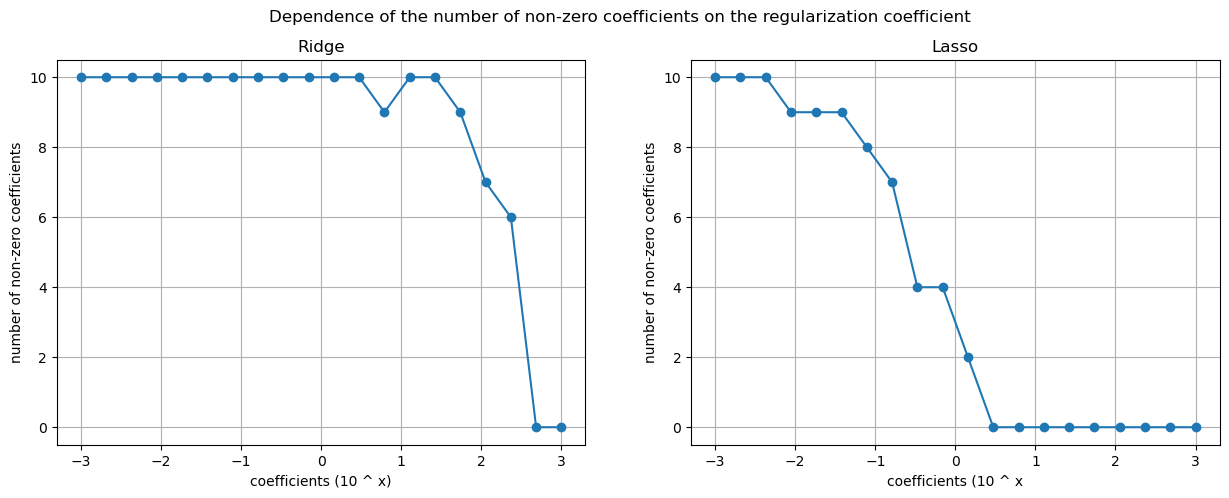

In [4]:
alphas = np.logspace(-3, 3, num = 20)
cnt_0_ridge = np.zeros(len(alphas))
cnt_0_lasso = np.zeros(len(alphas))
for i in range(len(alphas)):
    model = Ridge(alpha = alphas[i])
    for coef in model.fit(X_train, y_train).coef_:
        if (abs(coef) > 2):
            cnt_0_ridge[i] += 1
    model = Lasso(alpha = alphas[i])
    for coef in model.fit(X_train, y_train).coef_:
        if (abs(coef) > 2):
            cnt_0_lasso[i] += 1

plt.figure(figsize=[15, 5])

alphas = np.log10(alphas)

plt.subplot(1, 2, 1)
plt.plot(alphas, cnt_0_ridge, marker = 'o')
plt.title("Ridge")
plt.xlabel("coefficients (10 ^ x)")
plt.ylabel("number of non-zero coefficients")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alphas, cnt_0_lasso, marker = 'o')
plt.title("Lasso")
plt.xlabel("coefficients (10 ^ x")
plt.ylabel("number of non-zero coefficients")

plt.grid()
plt.suptitle("Dependence of the number of non-zero coefficients on the regularization coefficient")
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [6]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_test, y_test_pred)))
print('MAE: ', mean_absolute_error(y_test, y_test_pred))
print('R^2: ', r2_score(y_test, y_test_pred))

RMSE:  58.304295113912275
MAE:  49.602750809651916
R^2:  0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

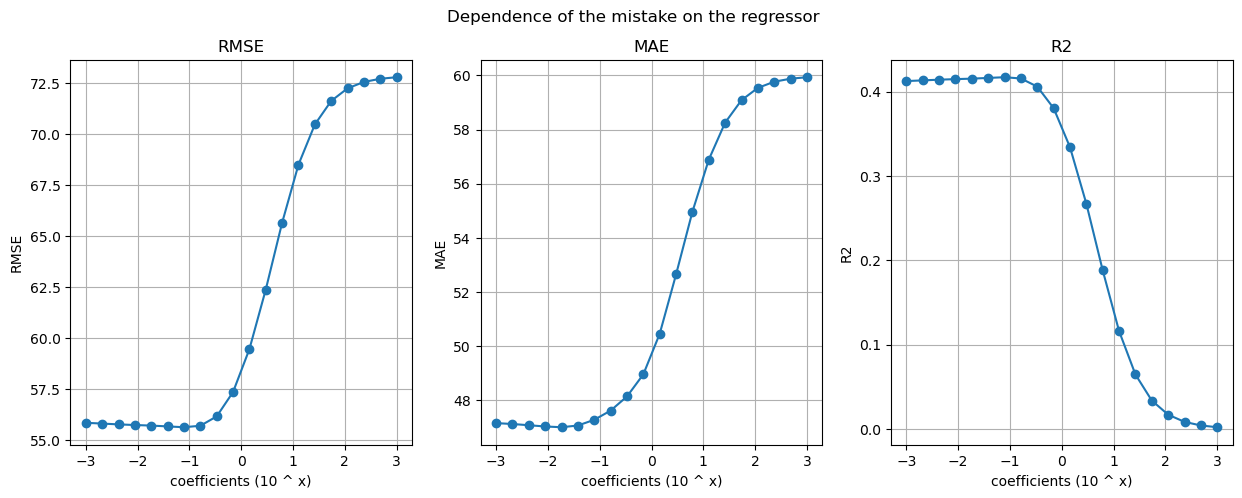

In [7]:
alphas = np.logspace(-3, 3, num = 20)
RMSE = [0] * len(alphas)
MAE = [0] * len(alphas)
R2 = [0] * len(alphas)
for i in range(len(alphas)):
    ridge = Ridge(alpha=alphas[i])
    ridge.fit(X_train, y_train)
    y_test_pred = ridge.predict(X_test)
    RMSE[i] = sqrt(mean_squared_error(y_test, y_test_pred))
    MAE[i] = mean_absolute_error(y_test, y_test_pred)
    R2[i] = r2_score(y_test, y_test_pred)

alphas = np.log10(alphas)

plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.plot(alphas, RMSE, marker = 'o')
plt.title("RMSE")
plt.xlabel("coefficients (10 ^ x)")
plt.ylabel("RMSE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(alphas, MAE, marker = 'o')
plt.title("MAE")
plt.xlabel("coefficients (10 ^ x)")
plt.ylabel("MAE")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(alphas, R2, marker = 'o')
plt.title("R2")
plt.xlabel("coefficients (10 ^ x)")
plt.ylabel("R2")
plt.grid()

plt.suptitle("Dependence of the mistake on the regressor")
plt.show()

In [8]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)

print('RMSE (alpha = 0.1): ', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2 (alpha = 0.1):', r2_score(y_test, y_test_pred))
print('MAE (alpha = 0.1): ', mean_absolute_error(y_test, y_test_pred))

RMSE (alpha = 0.1):  55.64176122404913
R^2 (alpha = 0.1): 0.41702880920983465
MAE (alpha = 0.1):  47.375463757061304


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([123.,  32.,  26.,  28.,  14.,   8.,  11.,   6.,   8.,   9.,   7.,
          5.,   5.,   5.,   4.,   1.,   2.,   4.,   3.,   2.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.]),
 array([8.85150216e-02, 6.74236674e+02, 1.34838483e+03, 2.02253299e+03,
        2.69668115e+03, 3.37082931e+03, 4.04497747e+03, 4.71912563e+03,
        5.39327379e+03, 6.06742195e+03, 6.74157010e+03, 7.41571826e+03,
        8.08986642e+03, 8.76401458e+03, 9.43816274e+03, 1.01123109e+04,
        1.07864591e+04, 1.14606072e+04, 1.21347554e+04, 1.28089035e+04,
        1.34830517e+04, 1.41571999e+04, 1.48313480e+04, 1.55054962e+04,
        1.61796443e+04, 1.68537925e+04, 1.75279406e+04, 1.82020888e+04,
        1.88762370e+04, 1.95503851e+04, 2.02245333e+04, 2.08986814e+04,
        2.15728296e+04, 2.22469778e+04, 2.29211259e+04, 2.35952741e+04,
        2.42694222e+04]),
 <BarContainer object of 36 artists>)

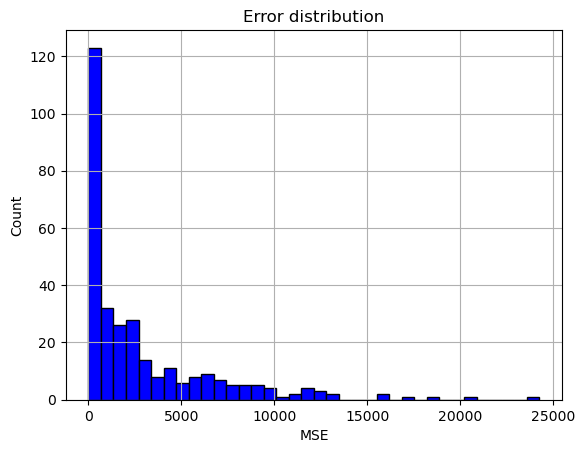

In [9]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
MSE = [0] * len(X_train)

for i in range(len(X_train)):
    MSE[i] = mean_squared_error([y_train[i]], [y_train_pred[i]])

plt.title("Error distribution")
plt.xlabel('MSE')
plt.ylabel('Count')
plt.grid()
plt.hist(MSE, color = 'blue', edgecolor = 'black', bins = int(180/5))


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)
X_train2 = []
y_train2 = []

for i in range(len(X_train)):
    MSE = mean_squared_error([y_train[i]], [y_train_pred[i]])
    if MSE < 10000:
        X_train2.append(X_train[i])
        y_train2.append(y_train[i])

X_train = X_train2[:]
y_train = y_train2[:]

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)

print('RMSE (alpha = 0.1): ', sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2 (alpha = 0.1):', r2_score(y_test, y_test_pred))
print('MAE (alpha = 0.1): ', mean_absolute_error(y_test, y_test_pred))

RMSE (alpha = 0.1):  56.66171443511316
R^2 (alpha = 0.1): 0.39546036577210175
MAE (alpha = 0.1):  47.661807088804416


__Задание 3.__ Отчёт

**(2 балла)**

В данной работе была обучена модель линейной регрессии Ridge и измерены метрики качества регресии - RMSE, R2, MAE. 
Эффективность работы регресии зависит от коэффициента регуляризации, который можно подобрать по графику ошибок, в нашем случае
оптимальным был коэффициент - 0.1, однако при нём ошибки незначительно отличались от тех, что были получены при регресии Ridge
с параметрами по умолчанию. При построении гистограммы распределния ошибок MAE было замечено, что на большей части обчающей 
выборки ошибка приблизительно равна 0, но есть и такие данные, где она гораздо больше - выбросы. Однако их удаление из 
обучающей выборки и переобучение модели не улучшило её качество, что можно объяснить тем, что при удалении выбросов модель
учиться на однотипных, искусственных данных и не может выдавать точные ответы на всех данных из тренировочной выборки.